### Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime

yf.pdr_override()

### Get Data From Yahoo Finance

In [98]:
start= datetime.datetime(2019, 8, 5)
end= datetime.datetime(2024, 8, 1)
spy = pdr.data.get_data_yahoo('SPY', start= start, end=end)
spy.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-05,288.089996,288.209991,281.720001,283.820007,262.324799,178745400
2019-08-06,285.910004,288.040009,284.279999,287.799988,266.003387,120711700
2019-08-07,284.399994,288.820007,282.040009,287.970001,266.160492,140572300
2019-08-08,289.619995,293.619995,289.010010,293.619995,271.382629,87713900
2019-08-09,292.579987,293.239990,289.649994,291.619995,269.534027,93730000


### Process and Format Data

In [99]:
day = np.arange(1, len(spy)+1)
spy['Day'] = day
spy = spy[['Day', 'Open', 'High', 'Low', 'Close']]
spy.head()

,Day,Open,High,Low,Close
Date,,,,,
2019-08-05,1,288.089996,288.209991,281.720001,283.820007
2019-08-06,2,285.910004,288.040009,284.279999,287.799988
2019-08-07,3,284.399994,288.820007,282.040009,287.970001
2019-08-08,4,289.619995,293.619995,289.010010,293.619995
2019-08-09,5,292.579987,293.239990,289.649994,291.619995


In [100]:
spy['25 MA'] = spy['Close'].rolling(25).mean().shift()
spy['50 MA'] = spy['Close'].rolling(50).mean().shift()

C:\Users\abhis\AppData\Local\Temp\ipykernel_31332\1446090652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy['25 MA'] = spy['Close'].rolling(25).mean().shift()


In [101]:
spy.head()

,Day,Open,High,Low,Close,25 MA,50 MA
Date,,,,,,,
2019-08-05,1,288.089996,288.209991,281.720001,283.820007,NaN,NaN
2019-08-06,2,285.910004,288.040009,284.279999,287.799988,NaN,NaN
2019-08-07,3,284.399994,288.820007,282.040009,287.970001,NaN,NaN
2019-08-08,4,289.619995,293.619995,289.010010,293.619995,NaN,NaN
2019-08-09,5,292.579987,293.239990,289.649994,291.619995,NaN,NaN


In [102]:
spy = spy.dropna()
spy.head()

,Day,Open,High,Low,Close,25 MA,50 MA
Date,,,,,,,
2019-10-15,51,297.100006,299.700012,296.970001,298.880005,296.303599,293.403199
2019-10-16,52,298.369995,299.160004,297.920013,298.399994,296.333599,293.704399
2019-10-17,53,299.679993,300.239990,298.519989,299.279999,296.259598,293.916399
2019-10-18,54,298.690002,299.399994,297.029999,297.970001,296.179198,294.142599
2019-10-21,55,299.420013,300.209991,298.940002,299.989990,296.054398,294.229599


In [103]:
spy['Signal'] = np.where(spy['25 MA'] > spy['50 MA'], 1, 0)
spy['Signal'] = np.where(spy['25 MA'] < spy['50 MA'], -1, spy['Signal'])
spy.head()

,Day,Open,High,Low,Close,25 MA,50 MA,Signal
Date,,,,,,,,
2019-10-15,51,297.100006,299.700012,296.970001,298.880005,296.303599,293.403199,1
2019-10-16,52,298.369995,299.160004,297.920013,298.399994,296.333599,293.704399,1
2019-10-17,53,299.679993,300.239990,298.519989,299.279999,296.259598,293.916399,1
2019-10-18,54,298.690002,299.399994,297.029999,297.970001,296.179198,294.142599,1
2019-10-21,55,299.420013,300.209991,298.940002,299.989990,296.054398,294.229599,1


In [104]:
spy['Return'] = np.log(spy['Close']).diff()
spy['Strategy'] = spy['Signal'] * spy['Return']
spy['Entry'] = spy.Signal.diff()
spy.head()

,Day,Open,High,Low,Close,25 MA,50 MA,Signal,Return,Strategy,Entry
Date,,,,,,,,,,,
2019-10-15,51,297.100006,299.700012,296.970001,298.880005,296.303599,293.403199,1,NaN,NaN,NaN
2019-10-16,52,298.369995,299.160004,297.920013,298.399994,296.333599,293.704399,1,-0.001607,-0.001607,0.0
2019-10-17,53,299.679993,300.239990,298.519989,299.279999,296.259598,293.916399,1,0.002945,0.002945,0.0
2019-10-18,54,298.690002,299.399994,297.029999,297.970001,296.179198,294.142599,1,-0.004387,-0.004387,0.0
2019-10-21,55,299.420013,300.209991,298.940002,299.989990,296.054398,294.229599,1,0.006756,0.006756,0.0


### Plot Trades

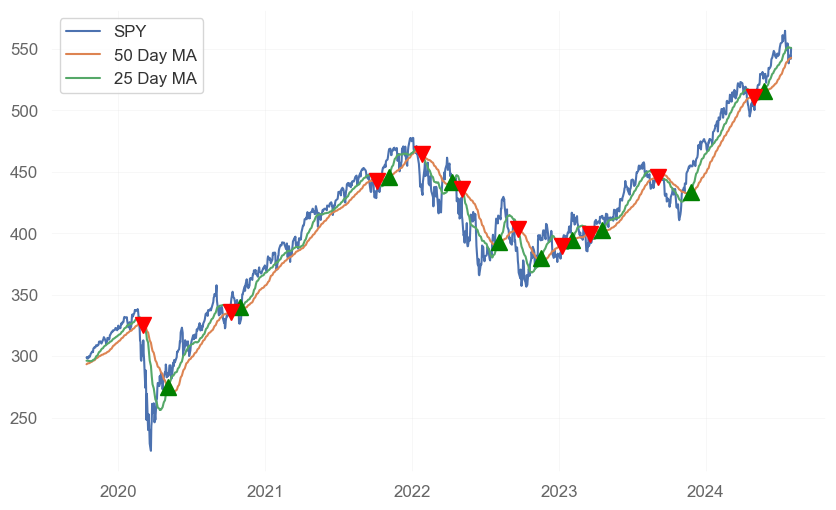

In [105]:
plt.grid(True, alpha=0.3)
plt.plot(spy.iloc[:]['Close'], label= "SPY")
plt.plot(spy.iloc[:]['50 MA'], label="50 Day MA")
plt.plot(spy.iloc[: ]['25 MA'], label="25 Day MA")
plt.plot(spy[:].loc[spy.Entry == 2].index, spy[: ]["25 MA"][spy.Entry == 2], "^", color = 'green', markersize=12)
plt.plot(spy[:].loc[spy.Entry == -2].index, spy[: ]["50 MA"][spy.Entry == -2], "v", color = 'red', markersize=12)
plt.legend(loc=2)

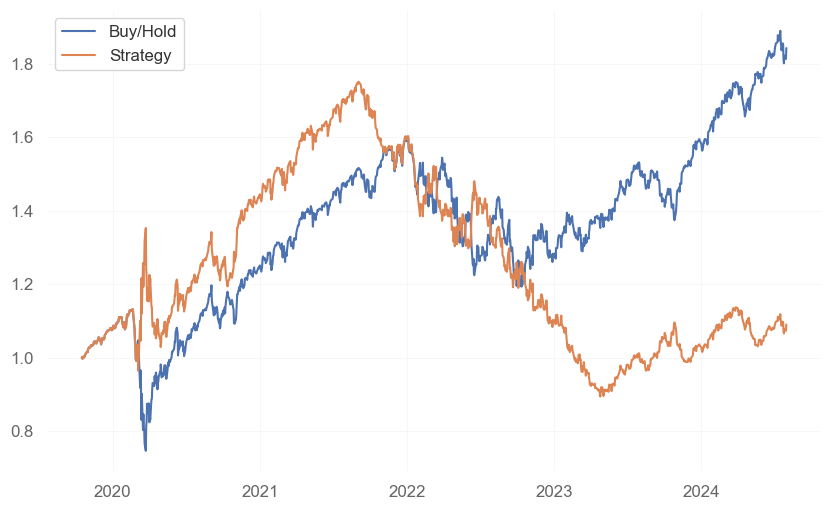

In [106]:
plt.plot(np.exp(spy['Return']).cumprod(), label="Buy/Hold")
plt.plot(np.exp(spy['Strategy']).cumprod(), label="Strategy")
plt.grid(True, alpha=0.3)
plt.legend(loc =2)

In [107]:
spy['Stock %'] = spy['Close'].pct_change()
spy['Strategy %'] = spy['Stock %'] * spy['Signal']

In [108]:
strategy_returns = spy['Strategy %'].dropna()

In [109]:
import quantstats as qs
# Sharpe Ratio
sharpe_ratio = qs.stats.sharpe(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio}")

# Max Drawdown
max_drawdown = qs.stats.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown}")

# Calmar Ratio
calmar_ratio = qs.stats.calmar(strategy_returns)
print(f"Calmar Ratio: {calmar_ratio}")


Sharpe Ratio: 0.06249210701096589
Max Drawdown: -0.5111424816215198
Calmar Ratio: -0.012332806328361146
